In [ ]:
# This is a practice based on the article "Visualizing YouTube videos using Seaborn and WordCloud in Python" 
# written by Tanmayee W

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [5]:
df_you = pd.read_csv('C:/Users/ica/Documents/DataScience/data/USvideos.csv')
print(df_you.shape)
print(df_you.nunique())

(40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [6]:
df_you.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [7]:
df_you.head(n=5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
# normalizing data using log distribution 

df_you['likes_log'] = np.log(df_you['likes']+1)
df_you['views_log'] = np.log(df_you['views']+1)
df_you['dislikes_log'] = np.log(df_you['dislikes']+1)
df_you['comment_count_log'] = np.log(df_you['comment_count']+1)

C:\Users\ica\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


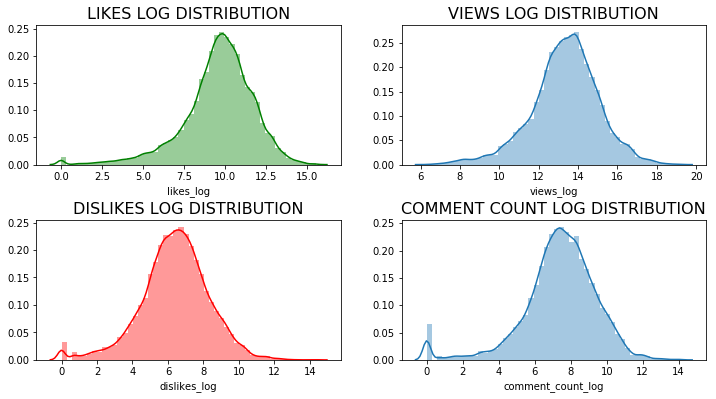

In [10]:
# plot data

plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(df_you['likes_log'], color = 'green')
g1.set_title("LIKES LOG DISTRIBUTION", fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(df_you['views_log'])
g2.set_title("VIEWS LOG DISTRIBUTION", fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(df_you['dislikes_log'], color = 'r')
g3.set_title("DISLIKES LOG DISTRIBUTION", fontsize = 16)

plt.subplot(224)
g4 = sns.distplot(df_you['comment_count_log'])
g4.set_title("COMMENT COUNT LOG DISTRIBUTION", fontsize = 16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show() 

In [11]:
np.unique(df_you["category_id"])

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43],
      dtype=int64)

In [12]:
# assign names to categories 

df_you['category_name'] = np.nan

df_you.loc[(df_you["category_id"]== 1),"category_name"] = 'Film and Animation'
df_you.loc[(df_you["category_id"] == 2), "category_name"] = 'Cars and Vehicles'
df_you.loc[(df_you["category_id"] == 10), "category_name"] = 'Music'
df_you.loc[(df_you["category_id"] == 15), "category_name"] = 'Pet and Animals'
df_you.loc[(df_you["category_id"] == 17), "category_name"] = 'Sports'
df_you.loc[(df_you["category_id"] == 19), "category_name"] = 'Travel and Events'
df_you.loc[(df_you["category_id"] == 20), "category_name"] = 'Gaming'
df_you.loc[(df_you["category_id"] == 22), "category_name"] = 'People and Blogs'
df_you.loc[(df_you["category_id"] == 23), "category_name"] = 'Comedy'
df_you.loc[(df_you["category_id"] == 24), "category_name"] = 'Entertainment'
df_you.loc[(df_you["category_id"] == 25), "category_name"] = 'News and Politics'
df_you.loc[(df_you["category_id"] == 26), "category_name"] = 'How to and Style'
df_you.loc[(df_you["category_id"] == 27), "category_name"] = 'Education'
df_you.loc[(df_you["category_id"] == 28), "category_name"] = 'Science and Technology'
df_you.loc[(df_you["category_id"] == 29), "category_name"] = 'Non-profits and Activism'
df_you.loc[(df_you["category_id"] == 43), "category_name"] = 'Shows'

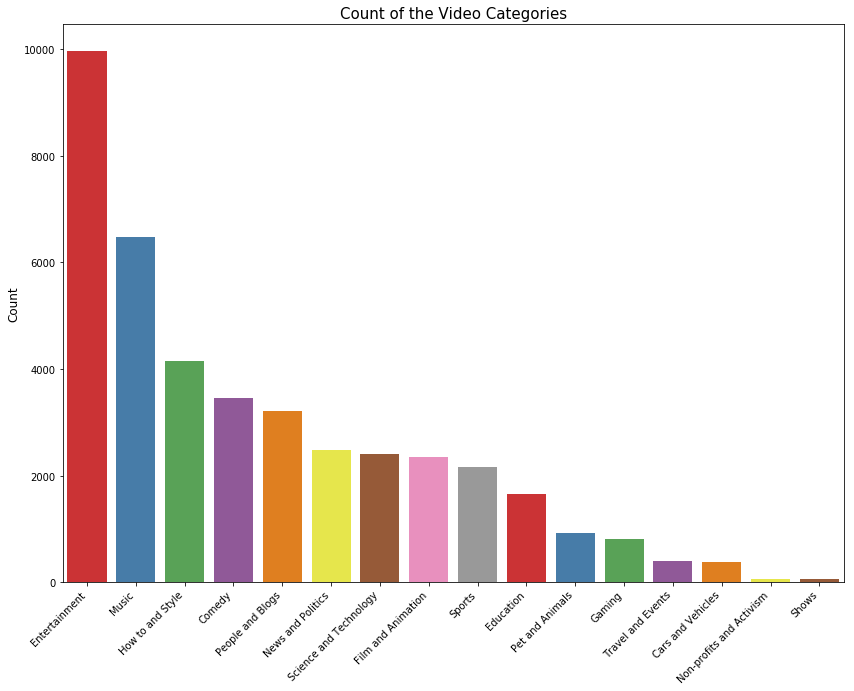

In [13]:
# identify popular video categories

plt.figure(figsize = (14,10))
g = sns.countplot('category_name', data = df_you, palette="Set1", order = df_you['category_name'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show() 

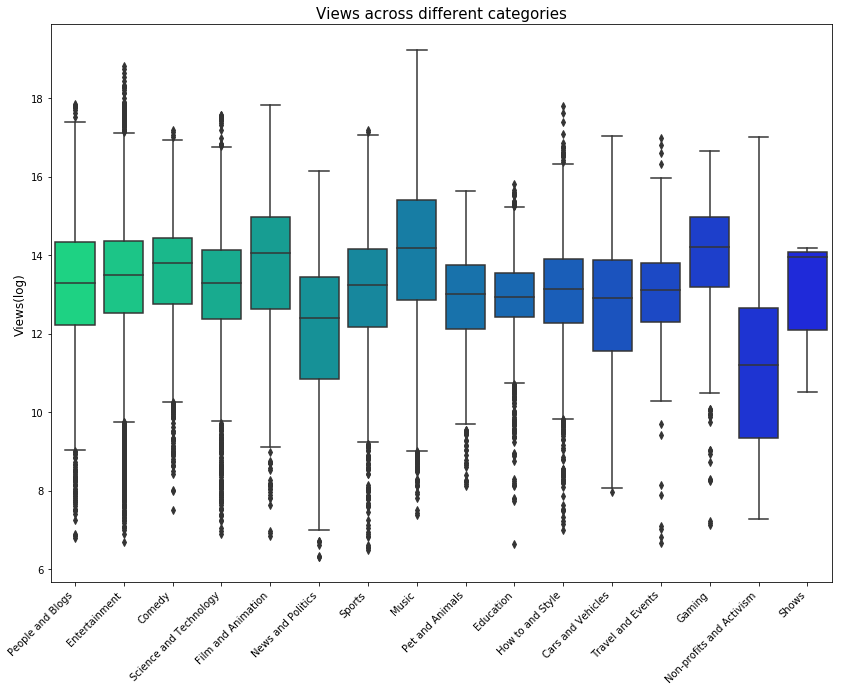

In [14]:
# box plot for views in different categories

plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'views_log', data = df_you, palette="winter_r")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set_title("Views across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Views(log)", fontsize=12)
plt.subplots_adjust(wspace=0.9, hspace = 0.9, top=0.9)
plt.show() 

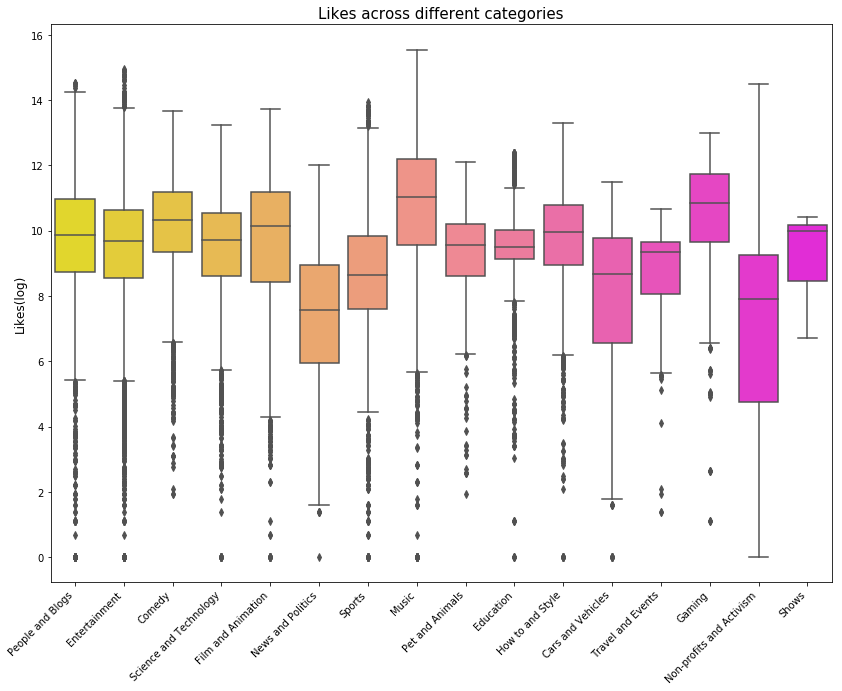

In [15]:
# box plot for likes in different categories

plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'likes_log', data = df_you, palette="spring_r")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set_title("Likes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.subplots_adjust(wspace=0.9, hspace = 0.9, top=0.9)
plt.show() 

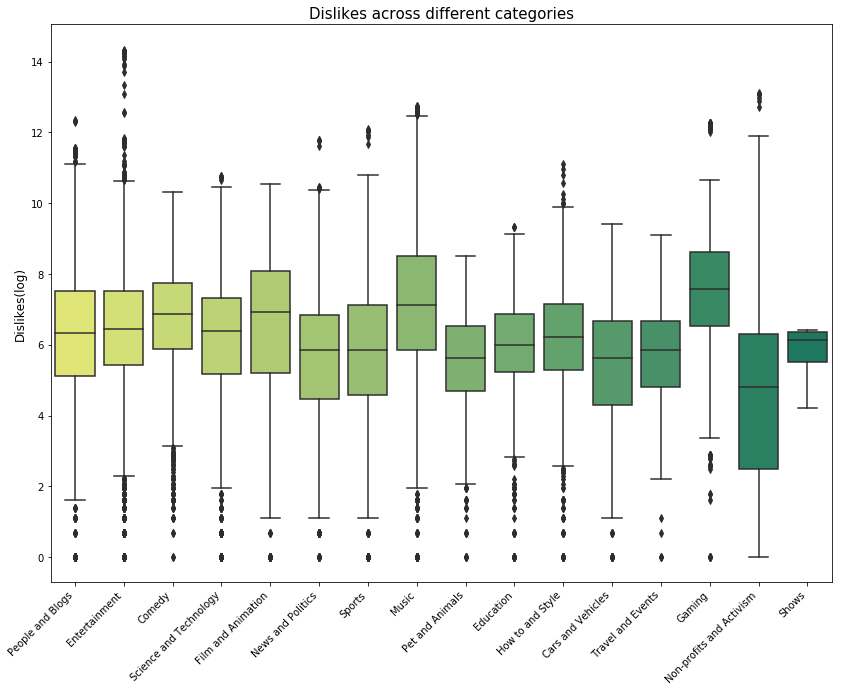

In [16]:
# box plot for dislikes in different categories

plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'dislikes_log', data = df_you, palette="summer_r")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set_title("Dislikes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.subplots_adjust(wspace=0.9, hspace = 0.9, top=0.9)
plt.show() 

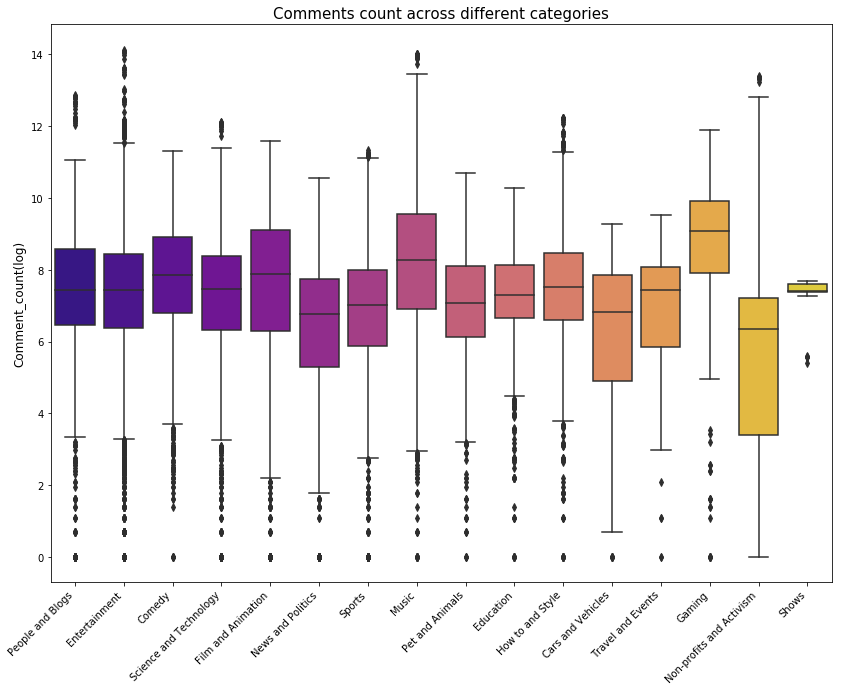

In [18]:
# box plot for comments in different categories

plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'comment_count_log', data = df_you, palette="plasma")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set_title("Comments count across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comment_count(log)", fontsize=12)
plt.subplots_adjust(wspace=0.9, hspace = 0.9, top=0.9)
plt.show() 

In [19]:
# calculate different measures 

df_you['like_rate'] = df_you['likes']/df_you['views']
df_you['dislike_rate'] = df_you['dislikes']/df_you['views']
df_you['comment_rate'] = df_you['comment_count']/df_you['views']

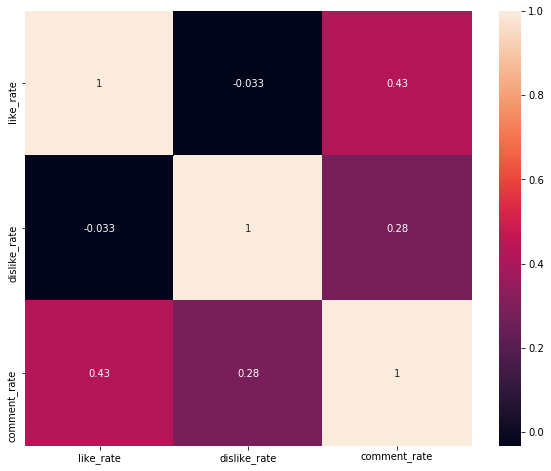

In [20]:
# heatmap visualization for engagement measures

plt.figure(figsize= (10,8))
sns.heatmap(df_you[['like_rate', 'dislike_rate', 'comment_rate']].corr(), annot=True)
plt.show() 

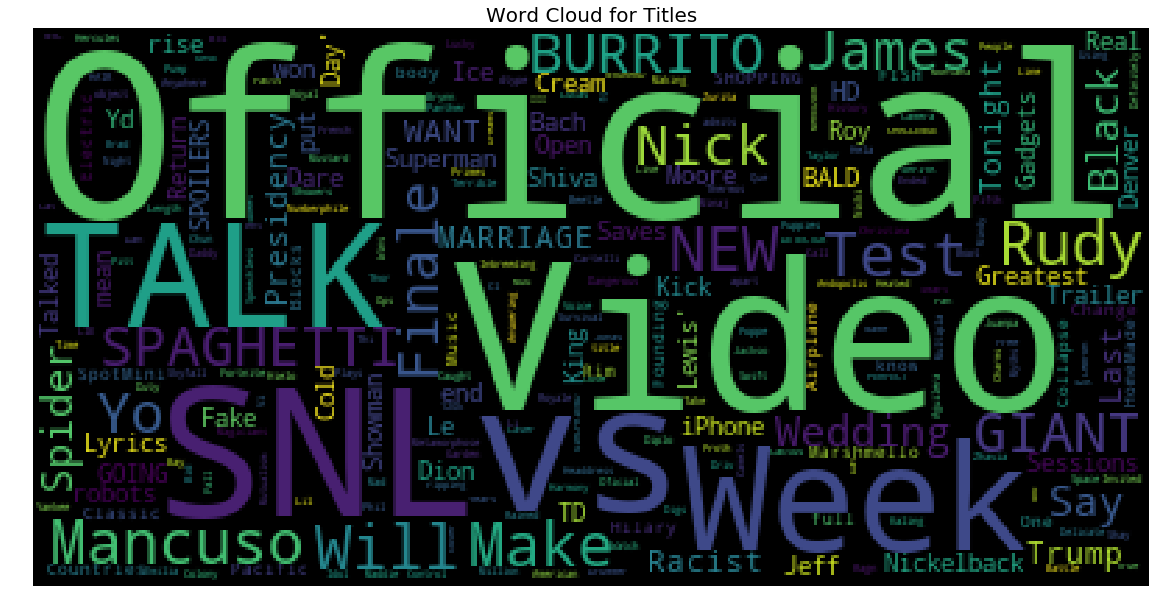

In [21]:
# create a word cloud to find out trending words for 'Title'

plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords =stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df_you['title']))

plt.imshow(wordcloud)
plt.title("Word Cloud for Titles", fontsize = 20)
plt.axis('off')
plt.show() 

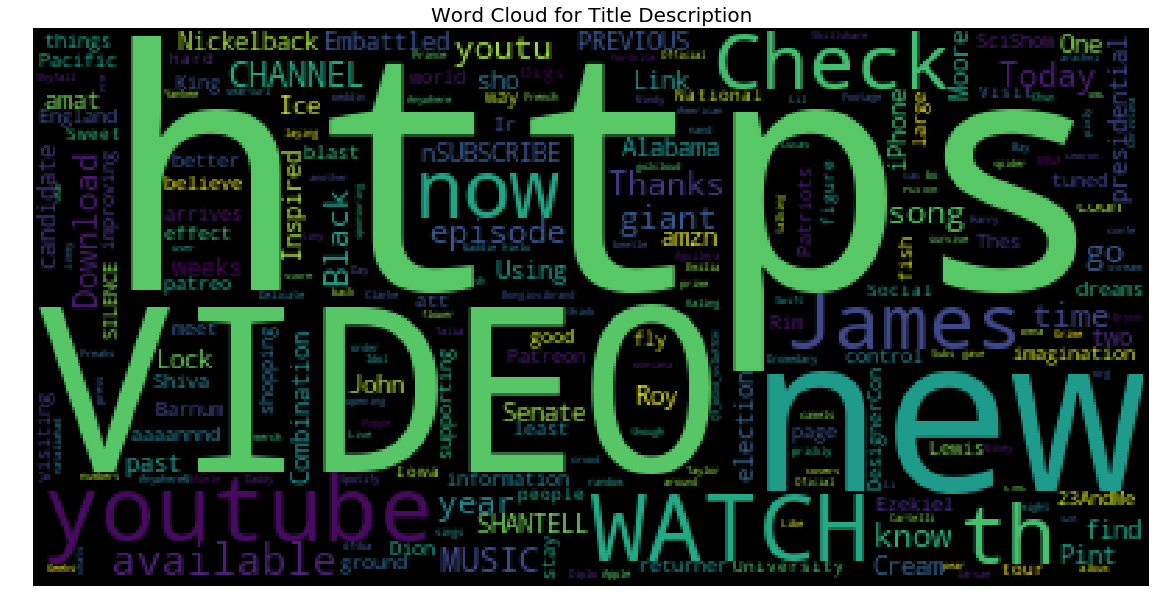

In [22]:
# create a word cloud to find out trending words for 'Title Description'

plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords =stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df_you['description']))

plt.imshow(wordcloud)
plt.title("Word Cloud for Title Description", fontsize = 20)
plt.axis('off')
plt.show() 

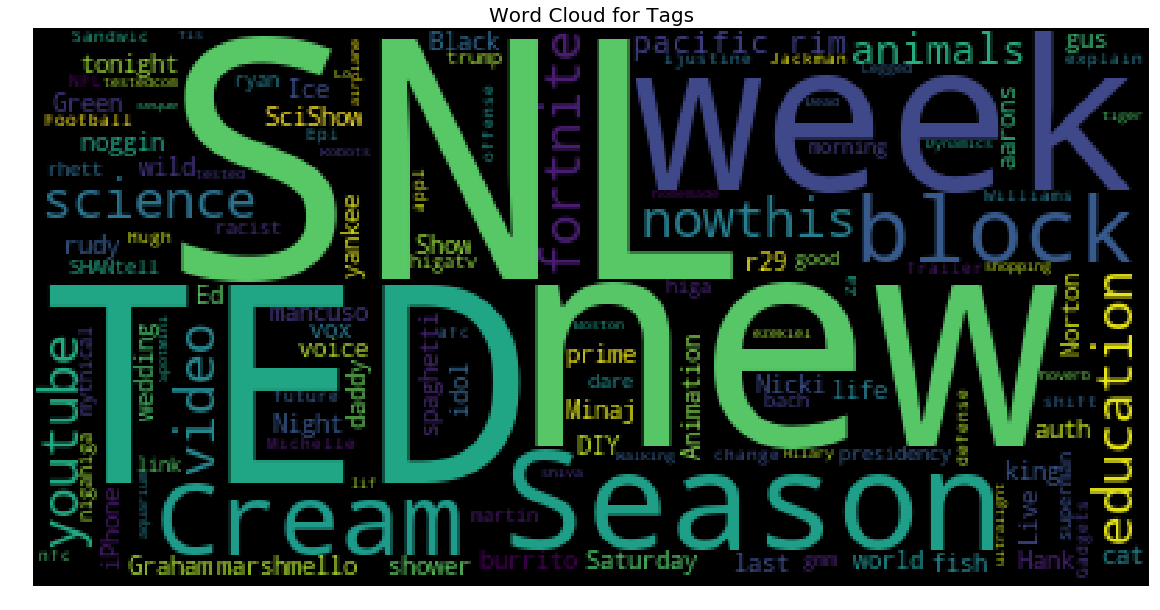

In [23]:
# create a word cloud to find out trending words for 'Tags'

plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords =stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df_you['tags']))

plt.imshow(wordcloud)
plt.title("Word Cloud for Tags", fontsize = 20)
plt.axis('off')
plt.show() 